# STEPS:
1. Add in your own api key tokens 
2. Run the # Get list of S&P 500 ticker symbols code block
3. Run # TODO: RUN THIS
4. Run # split tickers into 4 groups
5. Change tickers = tickers_vedanshi to your name 
6. Change df.to_csv('twitter_sentiment_vedanshi.csv') to your name
7. Download the file to your computer and send it in the group chat

In [16]:
import pandas as pd
import yfinance as yf

# Get list of S&P 500 ticker symbols
# get current tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# edit brk.b to brkb
sp500_tickers[sp500_tickers.index('BRK.B')] = 'BRK-B'
sp500_tickers[sp500_tickers.index('BF.B')] = 'BF-B'

# Download stock data for each symbol
sp500_data = yf.download(sp500_tickers, period='6d', interval='1d', group_by='ticker')

[*********************100%***********************]  503 of 503 completed


# TODO : FIGURE OUT MARKET CAP

In [4]:
import requests
from bs4 import BeautifulSoup

# Define the URL to the S&P 500 page on Yahoo Finance
url = 'https://finance.yahoo.com/quote/%5EGSPC/components?p=%5EGSPC'

# Use requests to get the HTML content of the page
response = requests.get(url)

# Use BeautifulSoup to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the S&P 500 components
table = soup.find('table', attrs={'class': 'W(100%)'})

# Find all the rows in the table
rows = table.find_all('tr')

# Loop through each row and extract the ticker symbol and market cap
for row in rows[1:]:
    cells = row.find_all('td')
    ticker = cells[0].text.strip()
    market_cap = cells[6].text.strip()
    print(ticker, market_cap)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
# get s&p for appl
sp500_data['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-14 00:00:00-04:00,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
2023-03-15 00:00:00-04:00,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
2023-03-16 00:00:00-04:00,152.160004,156.460007,151.639999,155.850006,155.850006,76161100
2023-03-17 00:00:00-04:00,156.080002,156.740005,154.279999,155.000000,155.000000,98862500
2023-03-20 00:00:00-04:00,155.070007,157.820007,154.149994,157.399994,157.399994,73641400
2023-03-21 00:00:00-04:00,157.320007,159.399994,156.539993,159.279999,159.279999,73868900


In [17]:
# TODO: RUN THIS
# Print the Close prices for the past 5 days for each stock
# print(sp500_data['Close'])
# get the tickers for the stocks
tickers = sp500_data.columns.levels[0].tolist()
tickers

['A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF-B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLK',
 'BMY',
 'BR',
 'BRK-B',
 'BRO',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDAY',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTLT',
 'CTR

In [18]:
import tweepy

# Set up Twitter API credentials


auth = tweepy.OAuthHandler(client_id, client_secret)
auth.set_access_token(access_token, access_token_secret)

In [22]:
# split tickers into 4 groups
tickers_luke = tickers[0:125]
tickers_roma = tickers[125:250]
tickers_daniel = tickers[250:375]
tickers_vedanshi = tickers[375:500]

In [20]:
import requests
from textblob import TextBlob

# create a dataframe to store the sentiment scores and the ticker and the text
df = pd.DataFrame(columns=['ticker', 'polarity_score', 'sentiment_score', 'text'])
# TODO: INCLUDE YOUR TICKER LIST HERE
tickers = tickers_vedanshi

for ticker in tickers:
    
    query = f'{ticker} lang:en'
    
    url = 'https://api.twitter.com/2/tweets/search/recent'
    headers = {'Authorization': f'Bearer {bearer_token}'}
    
    params = {'query': query, 'max_results': 100}
    response = requests.get(url, headers=headers, params=params)
    tweets = response.json()['data']
    
    for tweet in tweets:
        tweet = tweet['text']
        blob = TextBlob(tweet)
        polarity_score = blob.sentiment.polarity
        sentiment_score = blob.sentiment.subjectivity
        # df['sentiment_score'] = sentiment_score
        # df['text'] = tweet
        df.loc[len(df)] = [ticker, polarity_score, sentiment_score, tweet]
        # print(f'{ticker} {sentiment_score}')

In [23]:
# save df to csv
# TODO: ADD YOUR NAME TO THE FILENAME
df.to_csv('twitter_sentiment_vedanshi.csv')

In [ ]:
# read in the csv
df_luke = pd.read_csv('twitter_sentiment_luke.csv')
df_roma = pd.read_csv('twitter_sentiment_roma.csv')
df_daniel = pd.read_csv('twitter_sentiment_daniel.csv')
df_vedanshi = pd.read_csv('twitter_sentiment_vedanshi.csv')

In [ ]:
# combine the dataframes
df = pd.concat([df_luke, df_roma, df_daniel, df_vedanshi])

In [21]:
df

# 1 = subjective, 0 = objective
# subjective means that the text contains personal opinions, emotions, or judgments
# objective means that the text is factual 

# polarity score is the sentiment score: 1 = positive, 0 = neutral, -1 = negative

,ticker,polarity_score,sentiment_score,text
0,AAPL,0.136364,0.454545,$AAPL new alert at https://t.co/A7qrDarJHY #...
1,AAPL,0.350000,0.575000,At least $AAPL and $MSFT have great balance sh...
2,AAPL,0.500000,0.500000,#US100 ALL targets hit ! 750 points profit✅🎯\n...
3,AAPL,-0.400000,0.850000,1) you are probably spreading yourself too thi...
4,AAPL,0.000000,0.095833,"@ka1n0s The answer from Goldman on tech: ""Over..."
...,...,...,...,...
295,ZION,0.000000,0.000000,@AnyaBriggs9 @natalie_Zion_ I don’t find Ameri...
296,ZION,0.700000,0.600000,@relmyers Good Zion news. https://t.co/FFMYtSqh09
297,ZION,0.000000,0.000000,RT @hmeyer_21: @BleacherReport @Antmikes Zion ...
298,ZION,0.000000,0.076923,RT @RTNBA: There’s still no update on whether ...


In [ ]:
# average the sentiment score for each ticker
data = df.groupby('ticker').mean()
# reset the header
data = data.reset_index()
data

,ticker,polarity_score,sentiment_score
0,AAPL,0.166392,0.332949
1,MSFT,0.218702,0.437731
2,ZION,0.121657,0.317789


In [ ]:
# add a column to the dataframe to store the 5-day return
data['five_day_return'] = 0
for ticker in tickers:
    # Calculate the 5-day return for the ticker
    stock_data = sp500_data[ticker]['Close']
    adj_close = sp500_data[ticker]['Adj Close']
    five_day_return = (adj_close.iloc[-1] - adj_close.iloc[0]) / adj_close.iloc[0]

    # append the 5-day return to the dataframe
    data.loc[data['ticker'] == ticker, 'five_day_return'] = five_day_return


In [ ]:
data

,ticker,polarity_score,sentiment_score,five_day_return
0,AAPL,0.166392,0.332949,0.043843
1,MSFT,0.218702,0.437731,0.049810
2,ZION,0.121657,0.317789,0.031300


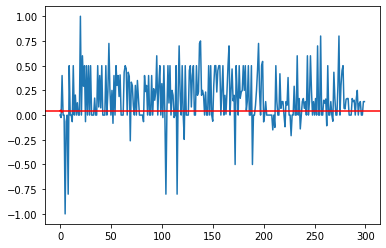

In [ ]:
# plot porality score from the dataframe df
import matplotlib.pyplot as plt
plt.plot(df['polarity_score'])
# plot line at 5-day return
plt.axhline(data['five_day_return'][0], color='red')
plt.plot(data['five_day_return'], color='red')

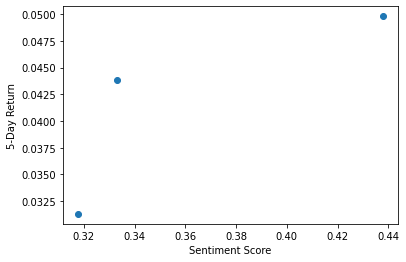

In [ ]:
# plot the sentiment score vs the 5-day return
import matplotlib.pyplot as plt
plt.scatter(data['sentiment_score'], data['five_day_return'])
plt.xlabel('Sentiment Score')
plt.ylabel('5-Day Return')
plt.show()

In [ ]:
# Set up the API endpoint and headers
url = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'Authorization': f'Bearer {bearer_token}'}

# Loop over the tickers
for ticker in tickers:
    # Set up the search query
    query = f'${ticker} OR {ticker} Corp OR {ticker} Inc lang:en'
    params['query'] = query

    # Send the request to the API
    response = requests.get(url, headers=headers, params=params)

    # Extract the tweets from the response
    tweets = response.json()['data']

    # Calculate the average sentiment score for the tweets
    total_score = 0
    count = 0
    for tweet in tweets:
        text = tweet['text']
        blob = TextBlob(text)
        sentiment_score = blob.sentiment.polarity
        total_score += sentiment_score
        count += 1
    if count > 0:
        avg_score = total_score / count
    else:
        avg_score = None

    # Print the ticker and average sentiment score
    print(f'{ticker}: {avg_score}')


KeyError: 'data'

In [ ]:
import requests
from textblob import TextBlob

# Set up the search query
query = 'AAPL lang:en'

# Set up the API endpoint and headers
url = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'Authorization': f'Bearer {bearer_token}'}

# Set up the request parameters
params = {'query': query, 'max_results': 100}

# Send the request to the API
response = requests.get(url, headers=headers, params=params)

# Check if the response contains an error message
if response.status_code != 200:
    print(f'Error: {response.json()["errors"][0]["message"]}')
else:
    # Extract the tweets from the response
    if 'data' in response.json():
        tweets = response.json()['data']

        # Calculate the average sentiment score for the tweets
        total_sentiment_score = 0
        for tweet in tweets:
            text = tweet['text']
            blob = TextBlob(text)
            sentiment_score = blob.sentiment.polarity
            total_sentiment_score += sentiment_score
        avg_sentiment_score = total_sentiment_score / len(tweets)
        print(f'Average sentiment score for {query}: {avg_sentiment_score:.2f}')
    else:
        print(f'No tweets found for {query}')
        


Average sentiment score for AAPL lang:en: 0.25


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Split data into X and y
X = data[['Sentiment_Score']]
y = data['Returns']

# Add intercept term to X
X = sm.add_constant(X)

# Create linear regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the regression summary
print(results.summary())

In [ ]:

# Split data into X and y
X = data[['Sentiment_Score']]
y = data['Returns']

# Add intercept term to X
X = sm.add_constant(X)

# Create linear regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the regression summary
print(results.summary())

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: [Errno 48] Address already in use

In [ ]:
import pandas as pd
import requests

# Download the list of S&P 500 tickers
url = 'https://www.spglobal.com/spdji/en/indices/equity/sp-500/download'
r = requests.get(url)
tickers = r.text.split('\n')[1:-1]

# Create a DataFrame with the tickers
sp500_df = pd.DataFrame({'Symbol': tickers})

# Save the DataFrame as a CSV file
sp500_df.to_csv('SP500_Tickers.csv', index=False)


In [ ]:
import tweepy
import pandas as pd

consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

tickers = pd.read_csv('SP500_Tickers.csv') # read in S&P 500 tickers
tweets = pd.DataFrame() # create empty dataframe for tweets

for ticker in tickers['Symbol']:
    try:
        query = ticker + ' -filter:retweets' # exclude retweets from query
        tweets_data = api.search(q=query, lang='en', count=100, tweet_mode='extended')
        for tweet in tweets_data:
            tweets = tweets.append({
                'Ticker': ticker,
                'Tweet': tweet.full_text,
                'Date': tweet.created_at
            }, ignore_index=True)
    except:
        print('Error downloading tweets for ticker:', ticker)

tweets.to_csv('SP500_Tweets.csv', index=False) # save tweets to csv file
